# Import and prepare data for stacked bar chart

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

import copy
import os
import glob


In [31]:

## full_data includes the dataset with photo information, datetime, location, etc.
data = pd.read_csv(os.path.join("data", "gnomon_data.csv"))
data["Datetime"] = pd.to_datetime(data["Datetime"])


In [5]:
# Set the colors of the nodes, which represent the locations of the photographs

locations = data['Location'].unique()
n_locations = data['Location'].unique().shape[0]
cmap = matplotlib.cm.get_cmap('viridis')

loc_colors  = dict()

for i in range(n_locations):
    loc_colors[locations[i]] = cmap(i / n_locations)
    
node_colors = [loc_colors[i] for i in data['Location'].values]

# Plot the data

- Cluster is a variable that can be changed to represent the cluster you want to represent
- Cluster 0 shows all clusters

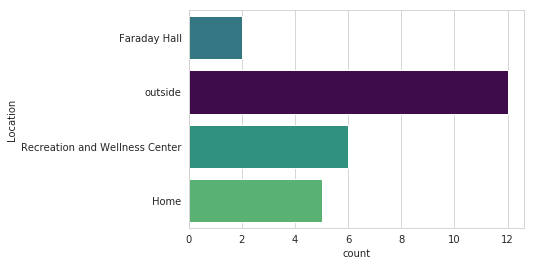

In [7]:
cluster = 1
N = len(data[data["Cluster"] == cluster].values)

sns.set_style("whitegrid")

sns.despine(left=True, right=True)

sns.countplot(y="Location", data=data[data["Cluster"] == cluster], palette=loc_colors)

plt.show()

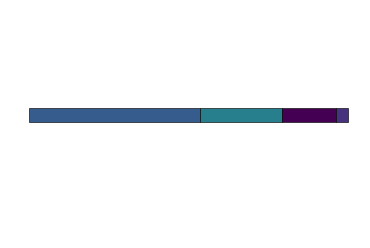

In [46]:

cluster = 5
N = len(data[data["Cluster"] == cluster].values)

if cluster != 0:
    counts = data[data["Cluster"] == cluster]["Location"].value_counts()
else:
    counts = data["Location"].value_counts()

x = copy.copy(counts.values)
tops = copy.copy(x)

for i in range(1, len(tops)):
    tops[i] += tops[i-1]
    
bottoms = copy.copy(tops)
for i in range(bottoms.shape[0]-1, 0, -1):
    bottoms[i] = bottoms[i-1]
bottoms[0] = 0

    
ax = plt.subplot(111)

for i in [-3, -2, -1, 1, 2, 3]:
    ax.barh([i], 0, 1.0, align='center', color='white', ecolor='black', label=None)


ax.barh([0 for i in range(len(x))], x, left=bottoms, 
       color=[loc_colors[loc] for loc in counts.index], 
        height=0.5, edgecolor=['black', 'black'], linewidth=0.6)

plt.axis('off');

path = os.path.join('stacked_bars', 'stacked_bar%d.png' % (cluster))
plt.savefig(path, dpi=750, bbox_inches='tight')